In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
mcdonalds = pd.read_csv("mcdonalds.csv")

In [10]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [11]:
mcdonalds.shape

(1453, 15)

In [12]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [27]:
MD = mcdonalds.iloc[:, 1:12].replace({'Yes': 1, 'No': 0})
round(MD.iloc[:, 1:12].mean(), 2)

C:\Users\kavin\AppData\Local\Temp\ipykernel_4380\3147074039.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(MD.iloc[:, 1:12].mean(), 2)


spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [35]:
from sklearn.decomposition import PCA

# convert 'Yes' and 'No' to 1 and 0 respectively in the first 11 columns
MD_x = mcdonalds.iloc[:, :11].replace({'Yes': 1, 'No': 0}).values

# perform PCA
MD_pca = PCA().fit(MD_x)

# print summary
summary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(MD_pca.explained_variance_),
    'Proportion of Variance': MD_pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)
})
print(summary_df)

    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


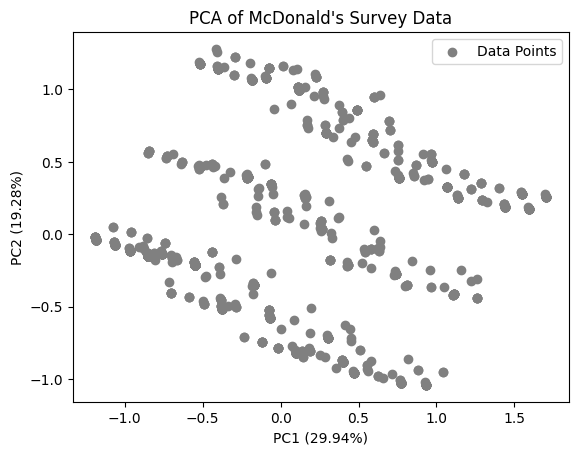

In [40]:
import matplotlib.pyplot as plt

# predict and project PCA
pca = PCA().fit(MD_x)
pca_proj = pca.transform(MD_x)

# plot PCA
plt.scatter(pca_proj[:, 0], pca_proj[:, 1], c='grey')
plt.xlabel('PC1 ({:.2%})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 ({:.2%})'.format(pca.explained_variance_ratio_[1]))
plt.title('PCA of McDonald\'s Survey Data')

# add legend
plt.legend(['Data Points'])
plt.show()

In [43]:
from sklearn.cluster import KMeans

np.random.seed(1234)

MD_kmeans = KMeans(n_clusters=8, n_init=10, random_state=1234).fit(MD_x)

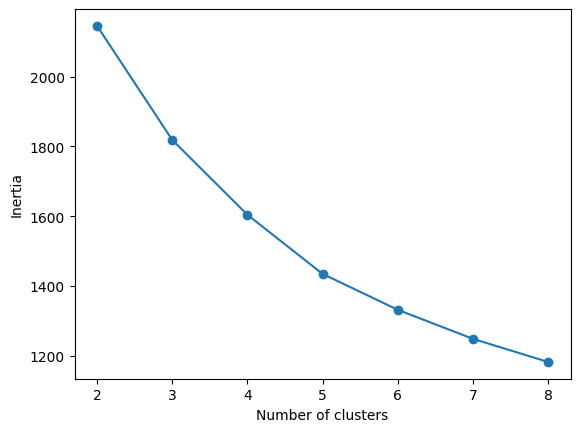

In [45]:
# Obtain inertia values for each number of clusters
inertias = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()